<a href="https://colab.research.google.com/github/SheikhMudassarHanif/NLP/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_hub as hub

In [2]:
df=pd.read_csv('/content/drive/MyDrive/wine-reviews.csv',usecols=['country','description','points','price','variety','winery'])
df.head()
#
df.dropna(inplace=True)
df.head()

,country,description,points,price,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,87,15.0,Tempranillo-Merlot,Tandem


In [3]:
df['label']=(df.points>=90).astype(int)
df=df[['description','label','points']]

In [4]:
df.tail()

,description,label,points
129966,Notes of honeysuckle and cantaloupe sweeten th...,1,90
129967,Citation is given as much as a decade of bottl...,1,90
129968,Well-drained gravel soil gives this wine its c...,1,90
129969,"A dry style of Pinot Gris, this is crisp with ...",1,90
129970,"Big, rich and off-dry, this is powered by inte...",1,90


In [25]:
train,val,test=np.split(df.sample(frac=1),[int(0.8*len(df)),int(0.9*len(df))])

In [6]:
len(train),len(val),len(test)

(96732, 12091, 12092)

In [26]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define some parameters
vocab_size = 10000  # Limit the number of words in the vocabulary
embedding_dim = 50  # Size of the embedding vectors
max_length = 100    # Maximum length of a sentence
trunc_type = 'post' # Truncate sequences at the end of the sentence
oov_tok = "<OOV>"   # Token for out-of-vocabulary words

# Sample dataset - 'train', 'val', and 'test' datasets should contain 'description' and 'label' columns.
train_texts = train['description'].values
train_labels = train['label'].values
val_texts = val['description'].values
val_labels = val['label'].values
test_texts = test['description'].values
test_labels = test['label'].values


# Step 1: Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts)

# Convert text to sequences of integers
train_sequences = tokenizer.texts_to_sequences(train_texts)
val_sequences = tokenizer.texts_to_sequences(val_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)


# Step 2: Pad the sequences to ensure equal length
train_padded = pad_sequences(train_sequences, maxlen=max_length, truncating=trunc_type)
val_padded = pad_sequences(val_sequences, maxlen=max_length, truncating=trunc_type)
test_padded = pad_sequences(test_sequences, maxlen=max_length, truncating=trunc_type)






# Step 3: Build the model with an Embedding layer
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Step 4: Train the model
history = model.fit(
    train_padded, train_labels,
    validation_data=(val_padded, val_labels),
    epochs=10,
    batch_size=1024
)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.6276 - loss: 0.6375 - val_accuracy: 0.7187 - val_loss: 0.5531
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.7403 - loss: 0.5220 - val_accuracy: 0.7924 - val_loss: 0.4420
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.8025 - loss: 0.4223 - val_accuracy: 0.8223 - val_loss: 0.3827
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.8300 - loss: 0.3702 - val_accuracy: 0.8358 - val_loss: 0.3656
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.8411 - loss: 0.3501 - val_accuracy: 0.8410 - val_loss: 0.3587
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.8474 - loss: 0.3375 - val_accuracy: 0.8439 - val_loss: 0.3450
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - accuracy: 0.8513 - loss: 0.3305 - val_accuracy: 0.8463 - val_loss: 0.3406
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.8579 - loss: 0.3180 - val_accuracy: 0.8388 - v

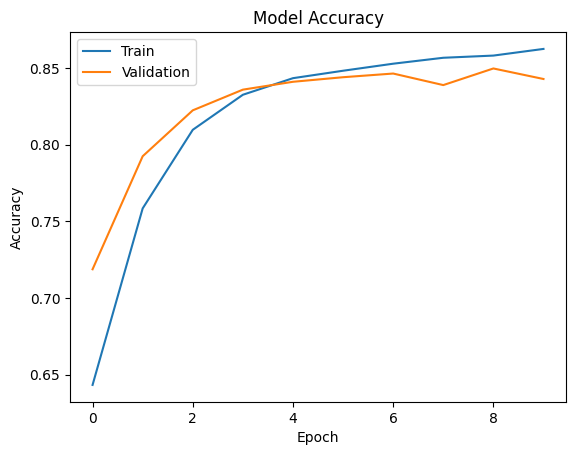

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

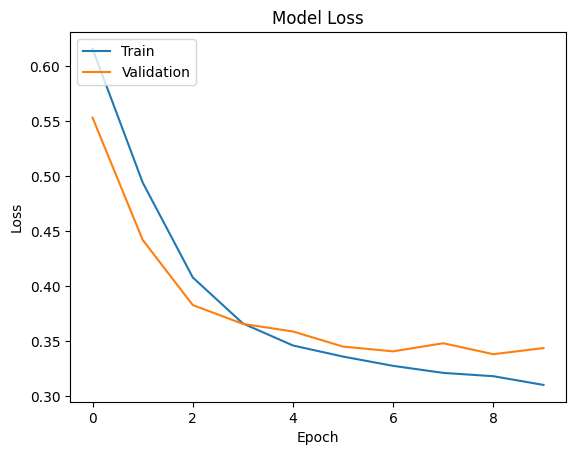

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [34]:
model.evaluate(test_padded,test_labels)

378/378 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8479 - loss: 0.3438


[0.3446443974971771, 0.8494045734405518]

In [31]:
predict_text = ['Thats a great expensive wine']  # Input should be a list of strings
predict_sequences = tokenizer.texts_to_sequences(predict_text)

# Step 2: Pad the sequence
predict_padded = pad_sequences(predict_sequences, maxlen=max_length, truncating=trunc_type)

# Step 3: Make prediction
prediction = model.predict(predict_padded)

# Output the predicted label (since sigmoid activation is used, the result is between 0 and 1)
predicted_label = 1 if prediction >= 0.5 else 0  # Assuming it's a binary classification task

print(f"Predicted label: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
Predicted label: 0


LSTM

In [52]:
encoder=tf.keras.layers.TextVectorization(max_tokens=vocab_size)
encoder.adapt(train['description'])

In [53]:
vocab=np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'to', 'it', 'its', 'on', 'fruit', 'aromas',
       'palate', 'finish'], dtype='<U23')

In [54]:
model=tf.keras.Sequential(
    [ encoder,
     tf.keras.layers.Embedding(
         input_dim=len(encoder.get_vocabulary()),
         output_dim=32,
         mask_zero=True
     ),
     tf.keras.layers.LSTM(32),
      tf.keras.layers.Dense(32,activation='relu'),
      tf.keras.layers.Dropout(0.4),
      tf.keras.layers.Dense(1,activation='sigmoid')
    ]
)


In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [57]:
history = model.fit(train['description'], train['label'],
                    epochs=10,
                    validation_data=(val['description'], val['label']),
                    batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test['description'], test['label'])

# Print test accuracy
print(f"Test Accuracy: {test_accuracy}")
# Explanation:

Epoch 1/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 165s 52ms/step - accuracy: 0.7900 - loss: 0.4407 - val_accuracy: 0.8482 - val_loss: 0.3309
Epoch 2/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 157s 52ms/step - accuracy: 0.8665 - loss: 0.3084 - val_accuracy: 0.8496 - val_loss: 0.3337
Epoch 3/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 202s 52ms/step - accuracy: 0.8842 - loss: 0.2700 - val_accuracy: 0.8497 - val_loss: 0.3543
Epoch 4/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 203s 52ms/step - accuracy: 0.8972 - loss: 0.2398 - val_accuracy: 0.8452 - val_loss: 0.3729
Epoch 5/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 202s 52ms/step - accuracy: 0.9083 - loss: 0.2174 - val_accuracy: 0.8430 - val_loss: 0.3813
Epoch 6/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 203s 53ms/step - accuracy: 0.9212 - loss: 0.1874 - val_accuracy: 0.8415 - val_loss: 0.4063
Epoch 7/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 198s 51ms/step - accuracy: 0.9298 - loss: 0.1668 - val_accuracy: 0.8372 - val_loss: 0.4660
Epoch 8/10
3023/3023 ━━━━━━━━━━━━━━━━━━━━ 157s 52ms/step - accuracy: 

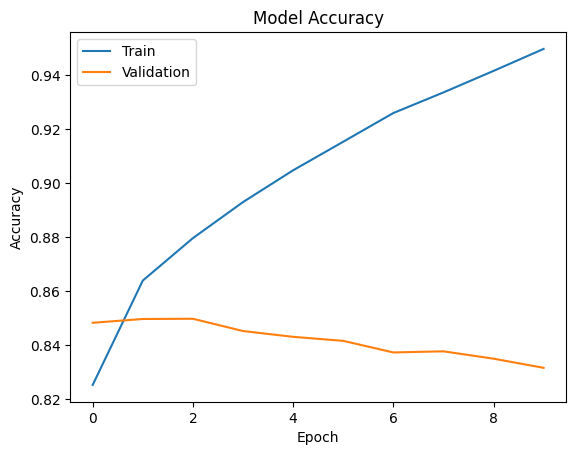

In [58]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

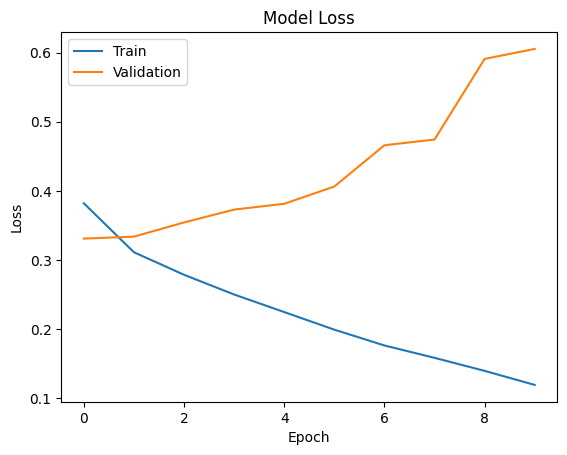

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [60]:
model.evaluate(test['description'],test['label'])

378/378 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.8394 - loss: 0.6236


[0.6279352903366089, 0.8379920721054077]